# FOI requests data analysis

As of June 26, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

In [1]:
import pandas as pd
import re
import requests
from plotnine import *
pd.set_option("display.max_columns", None)

## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [2]:
df = pd.read_csv('foi_final.csv')
df.tail(10)

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4969/1295593880.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,index,agency,date,title,status,purpose,period_covered,link,reason_denial
125186,125186,12959,DSWD,2022-06-26,"List of SAP Beneficiaries in Santiago, Ilocos Sur",PENDING,Research and Development,04/01/2020 - 06/01/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125187,125187,12961,DOH,2022-06-26,Covid cases stat for past 3-5months.,PENDING,School presentation,02/01/2022 - 06/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125188,125188,12962,BIR,2022-06-26,ITR 2316,DENIED,Employment,01/01/2022 - 04/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125189,125189,12963,DBM,2022-06-26,DBM Circulars pertaining to NGAs availing trai...,PENDING,Compliance to existing guidelines on procureme...,01/01/2007 - 06/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125190,125190,12964,DOH,2022-06-26,change my surname in my vaccine card,PENDING,use for travel purposes,11/09/2021 - 12/11/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125191,125191,12965,PSA,2022-06-26,"Maharlika Village, Taguig City Demographics",PENDING,Academic Research,01/01/2015 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125192,125192,12966,BAI,2022-06-26,"The number of livestock owners in Agoncillo, B...",PENDING,Thesis Research,06/26/2022 - 06/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125193,125193,12967,CHED,2022-06-26,Diploma and Transcript of Records,PENDING,Immigration to Canada,06/01/1997 - 06/01/1999,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125194,125194,12951,DOTr,2022-06-26,Annual Road Accident Reports in Metro Manila,PENDING,Thesis,01/21/2016 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125195,125195,12960,NTC,2022-06-26,Lost Phone,PENDING,Tracking my cellphone IMEI : 863742054184703,06/23/2022 - 06/23/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Drop 'Unnamed' column

In [3]:
df=df.drop('Unnamed: 0', axis=1)
df

,index,agency,date,title,status,purpose,period_covered,link,reason_denial
0,14191,DICT,2016-11-25,Projects to be implemented by the DICT for the...,ACCEPTED,Research,11/25/2016 - 11/25/2016,NaN,—
1,14217,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—
2,14218,DOTr,2016-11-25,List of Public Utility Bus companies and numbe...,SUCCESSFUL,Research for alternative solution in EDSA Traf...,01/01/2010 - 11/24/2016,NaN,—
3,14219,PAO,2016-11-25,Tax Inquiry,SUCCESSFUL,Personal Reasons,11/01/2016 - 11/15/2016,NaN,—
4,14220,DBM,2016-11-25,The Budget for local government buildings proj...,ACCEPTED,Architectural Thesis entitled Cagayan de Oro C...,11/25/2015 - 11/25/2016,NaN,—
...,...,...,...,...,...,...,...,...,...
125191,12965,PSA,2022-06-26,"Maharlika Village, Taguig City Demographics",PENDING,Academic Research,01/01/2015 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125192,12966,BAI,2022-06-26,"The number of livestock owners in Agoncillo, B...",PENDING,Thesis Research,06/26/2022 - 06/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125193,12967,CHED,2022-06-26,Diploma and Transcript of Records,PENDING,Immigration to Canada,06/01/1997 - 06/01/1999,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
125194,12951,DOTr,2022-06-26,Annual Road Accident Reports in Metro Manila,PENDING,Thesis,01/21/2016 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Convert to datetime

In [4]:
df.dtypes

index              int64
agency            object
date              object
title             object
status            object
purpose           object
period_covered    object
link              object
reason_denial     object
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

index                      int64
agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
reason_denial             object
dtype: object

## Check for duplicates

There are some duplicates found, but let's check. Remember, we only drop the duplicates if they are the same across **all columns**. Otherwise, we keep them, especially if the same requests are filed with different agencies.

In [7]:
df.duplicated().sum()

0

In [8]:
df[df.duplicated()]

,index,agency,date,title,status,purpose,period_covered,link,reason_denial


## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [9]:
df.isna().sum()

index                 0
agency                0
date                  0
title                 2
status                0
purpose               2
period_covered        0
link              90765
reason_denial     34431
dtype: int64

Interpretation: The **link** column have over 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [10]:
df.status.value_counts(normalize=True) *100

SUCCESSFUL                38.668967
DENIED                    23.726796
PENDING                   14.680181
PARTIALLY SUCCESSFUL       6.960286
ACCEPTED                   6.320489
AWAITING CLARIFICATION     3.354740
CLOSED                     2.766862
REFERRED                   2.121474
PROCESSING                 1.369852
EXTENDED                   0.030352
Name: status, dtype: float64

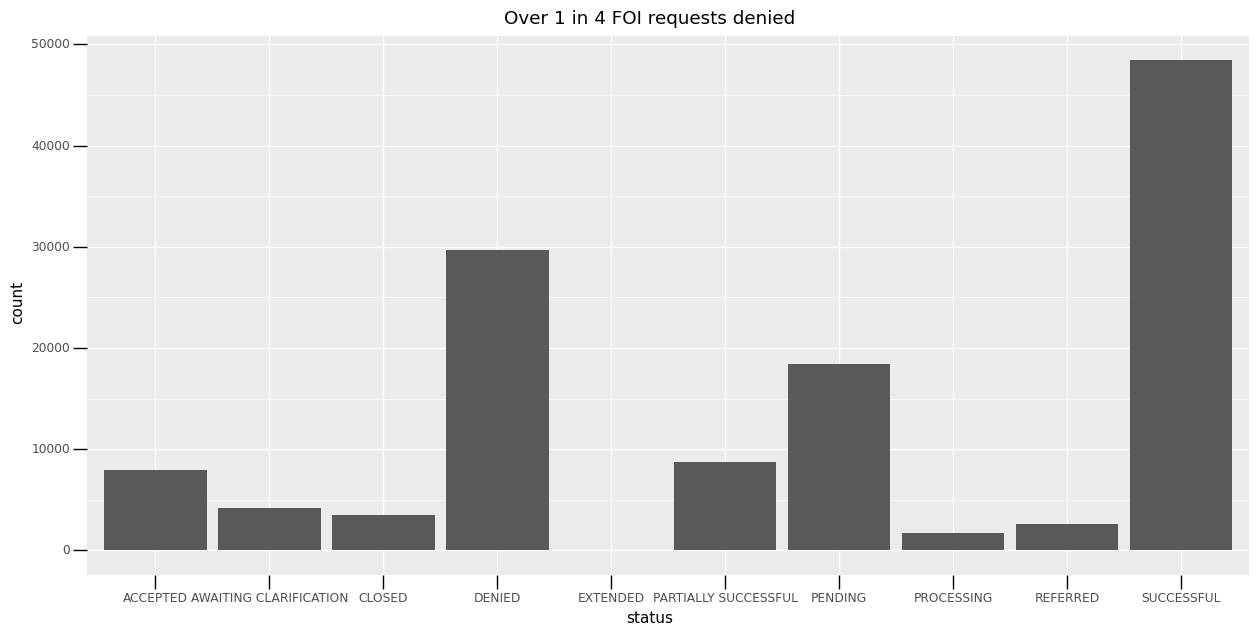

<ggplot: (314810023)>

In [11]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [12]:
df.agency.value_counts().head(10)

DOH      11563
PSA       7201
DOLE      5850
BIR       5368
DepEd     5048
SSS       4905
OWWA      4186
DSWD      4071
NTC       3961
DPWH      3224
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [14]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     3132
DSWD    2485
DENR    1374
DOH     1137
DTI     1064
NBI      901
DOLE     850
DOTr     809
HDMF     748
DILG     593
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [15]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate           367
Vaxcert                           222
VaxCert                           120
Vaccination Card                  103
Vaccination certificate            96
Vaccine Certificate                96
Lost Vaccination Card              82
VAXCERT                            71
Vax Cert                           58
Vax Certificate                    56
Lost Vaccine Card                  55
VACCINATION CERTIFICATE            52
Vaccine certificate                52
VaxCertPH                          46
vaxcert                            39
Vaccination card                   35
vaccination certificate            34
Vaxcert; incorrect middle name     32
Vaxcertificate                     31
Lost vaccination card              27
Name: title, dtype: int64

In [16]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)].reset_index(drop=True)
df_vax.count()

index             1458
agency            1458
date              1458
title             1458
status            1458
purpose           1458
period_covered    1458
link              1022
reason_denial      436
dtype: int64

Interpretation: Over one in 10 DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [17]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)].reset_index(drop=True)
df_sap[df_sap.status=="DENIED"].head(10)

,index,agency,date,title,status,purpose,period_covered,link,reason_denial
0,42321,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
1,42950,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
2,42941,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
3,43098,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
4,43248,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
5,43338,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,—
6,43357,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,—
7,43616,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,—
8,43614,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,incomplete-request
9,43779,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

In [18]:
df_sap.count()
#180 requests about SAP.

index             179
agency            179
date              179
title             179
status            179
purpose           179
period_covered    179
link                4
reason_denial     175
dtype: int64

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [19]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    571
True     395
Name: title, dtype: int64

Interpretation: 40% of OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [20]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification', 'tax', 'tax records']
df_tax = df[df['title'].isin(tax)].reset_index(drop=True)
df_tax.tail(20)

,index,agency,date,title,status,purpose,period_covered,link,reason_denial
1408,12286,BIR,2022-06-18,BIR Form 2316,DENIED,Requirement for Skill Assessment,01/01/2012 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1409,13777,BIR,2022-06-19,ITR,AWAITING CLARIFICATION,Visa Application,06/19/2018 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1410,12187,BIR,2022-06-19,ITR,PENDING,Visa Application,06/19/2018 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1411,13724,BIR,2022-06-20,ITR,AWAITING CLARIFICATION,Information,10/01/2021 - 10/01/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1412,13377,BIR,2022-06-22,Income Tax Return,AWAITING CLARIFICATION,For Visa application,08/01/2021 - 08/01/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1413,13375,BIR,2022-06-22,Income Tax Return,AWAITING CLARIFICATION,Application,12/01/2021 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1414,13455,BIR,2022-06-22,ITR,AWAITING CLARIFICATION,Copy For Children College Admission,01/01/2021 - 12/01/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1415,13253,BIR,2022-06-23,Income Tax Return,PARTIALLY SUCCESSFUL,For Visa Application,02/10/2021 - 02/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1416,13320,DOF,2022-06-23,Income Tax Return,REFERRED,For Visa Application,02/10/2021 - 02/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1417,13335,BIR,2022-06-23,Income Tax Return,AWAITING CLARIFICATION,For School ESC application,06/23/2021 - 06/23/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


In [21]:
df_tax.status.value_counts()

DENIED                    709
AWAITING CLARIFICATION    491
PENDING                    79
SUCCESSFUL                 63
ACCEPTED                   36
PARTIALLY SUCCESSFUL       29
REFERRED                    9
CLOSED                      8
PROCESSING                  4
Name: status, dtype: int64

In [22]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    49.649860
AWAITING CLARIFICATION    34.383754
PENDING                    5.532213
SUCCESSFUL                 4.411765
ACCEPTED                   2.521008
PARTIALLY SUCCESSFUL       2.030812
REFERRED                   0.630252
CLOSED                     0.560224
PROCESSING                 0.280112
Name: status, dtype: float64

# Top purpose of requests

In [73]:
df.purpose.value_counts(ascending=False).head(10)

Research                    10354
Research and Development     5047
Thesis                       2132
Undergraduate Thesis         2081
Research and development     2001
Architectural Thesis         1691
Thesis Research               871
Academic Research             803
research                      595
Follow up                     534
Name: purpose, dtype: int64

## For academic purposes

In [24]:
research = df.purpose.str.extractall(r'(.*\bresearch.+)', re.IGNORECASE)
research

,,0
,match,
2,0,Research for alternative solution in EDSA Traf...
7,0,School Paper Research(Thesis)
13,0,Research and development
19,0,Research for Cebu City Development to be used ...
22,0,Research and General Information
...,...,...
125160,0,Research and Development
125166,0,Accounting Research (Thesis)
125174,0,Research Proposal as part of the academic requ...


In [25]:
thesis = df.purpose.str.extractall(r'(.*\bthesis.+)', re.IGNORECASE)
thesis

,,0
,match,
4,0,Architectural Thesis entitled Cagayan de Oro C...
7,0,School Paper Research(Thesis)
10,0,Thesis Research
19,0,Research for Cebu City Development to be used ...
102,0,Research / Possible Thesis Study
...,...,...
125166,0,Accounting Research (Thesis)
125175,0,"Research, Thesis Writing"
125179,0,I am currently conducting Thesis I on the Anal...


In [26]:
academic = df.purpose.str.extractall(r'(.*\bacademic.+)', re.IGNORECASE)
academic

,,0
,match,
88,0,Academic research
364,0,Academic research
386,0,Academic Research
458,0,Academic research
464,0,Academic Research
...,...,...
125138,0,Academic Research
125174,0,Research Proposal as part of the academic requ...
125181,0,Architectural Academic Purposes (For Thesis)


In [27]:
research_2 = pd.concat([research, academic, thesis], ignore_index=True)
research_2.columns= ['purpose']
research_2

,purpose
0,Research for alternative solution in EDSA Traf...
1,School Paper Research(Thesis)
2,Research and development
3,Research for Cebu City Development to be used ...
4,Research and General Information
...,...
34356,Accounting Research (Thesis)
34357,"Research, Thesis Writing"
34358,I am currently conducting Thesis I on the Anal...
34359,Architectural Academic Purposes (For Thesis)


In [28]:
# research_2 = research_2.merge(df, on='purpose')
# research_2.duplicated().value_counts()

In [29]:
#research_2[research_2.duplicated()]

## For journalistic purposes

In [30]:
news = df.purpose.str.extractall(r'(.*\bnews.+)', re.IGNORECASE)
news

,,0
,match,
72,0,news article
76,0,news article
95,0,News report
183,0,"This will be used for the verification of ""new..."
250,0,Research and news article
...,...,...
120112,0,NEWS REPORT
120782,0,Analyzing numbers of OFW-related drug cases DF...
123780,0,News reporting


In [31]:
media = df.purpose.str.extractall(r'(.*\bmedia.+)', re.IGNORECASE)

In [32]:
journalism = pd.concat([news, media], ignore_index=True)
journalism.columns= ['purpose']
journalism

,purpose
0,news article
1,news article
2,News report
3,"This will be used for the verification of ""new..."
4,Research and news article
...,...
514,To stop people bullying and making stories on ...
515,To stop people bullying and making stories on ...
516,Natatakot po aq na. Ikalat ang Mukha q sa onli...
517,Natatakot po aq na. Ikalat ang Mukha q sa onli...


In [76]:
journalism = journalism.merge(df, on='purpose')
journalism.duplicated().sum()

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4969/1063134867.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'agency_x', 'index_x', 'status_x', 'title_x', 'period_covered_x', 'date_x', 'link_x', 'reason_denial_x'} in the result is deprecated and will raise a MergeError in a future version.


0

In [34]:
journalism = journalism.drop_duplicates().reset_index()

In [35]:
journalism

,level_0,purpose,index,agency,date,title,status,period_covered,link,reason_denial
0,0,news article,14265,PNP,2016-11-27,PNP Region 9 Director Billy Beltran and PNP Ge...,DENIED,06/01/2016 - 07/02/2016,NaN,incomplete-request
1,1,news article,14261,PNP,2016-11-27,oplan tokhang,SUCCESSFUL,07/01/2016 - 11/02/2016,NaN,—
2,4,News report,14278,DBM,2016-11-28,"Cost of President Duterte's trip to Laos, Chin...",DENIED,09/05/2016 - 11/23/2016,NaN,—
3,5,News report,14577,PCOO,2017-01-27,Cost of each of President Duterte's foreign tr...,DENIED,09/05/2016 - 12/17/2016,NaN,wrong-agency
4,6,News report,16675,PDEA,2017-11-21,Statistics on drug prices,DENIED,07/01/2016 - 11/21/2017,NaN,—
...,...,...,...,...,...,...,...,...,...,...
504,2138,To stop people bullying and making stories on ...,6818,NBI,2022-04-28,Getting IP address of fb dummy account,DENIED,03/31/2022 - 04/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
505,2139,To stop people bullying and making stories on ...,4460,NBI,2022-04-28,Getting IP address of fb dummy account,PENDING,03/31/2022 - 04/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
506,2142,Natatakot po aq na. Ikalat ang Mukha q sa onli...,5928,NBI,2022-05-06,Zora cash po sobra patubo at e barrow loan app...,PENDING,05/05/2022 - 05/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
507,2143,Natatakot po aq na. Ikalat ang Mukha q sa onli...,7977,NBI,2022-05-06,Zora cash po sobra patubo at e barrow loan app...,DENIED,05/05/2022 - 05/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [36]:
df[df.agency=="OP"]
#There were some requests for SALN.

,index,agency,date,title,status,purpose,period_covered,link,reason_denial
2565,16755,OP,2017-12-01,Total cost/expenses for the foreign trips of P...,PENDING,For research purposes for my year-end report f...,01/01/2017 - 12/01/2017,NaN,—
2589,16788,OP,2017-12-04,Cost of President Duterte's foreign trips in h...,PENDING,News research,07/01/2016 - 07/01/2017,NaN,—
2612,16793,OP,2017-12-05,Updates on the appeals of suspended and closed...,PENDING,Research,02/02/2017 - 12/05/2017,NaN,—
2703,16894,OP,2017-12-24,2018 General Appropriations Act,PENDING,Factual basis in research and review of certai...,12/24/2017 - 12/24/2017,NaN,—
2721,16912,OP,2017-12-30,Executive Order 126 dated 1959,PENDING,HISTORY,12/30/2017 - 12/30/2017,NaN,—
3029,17215,OP,2018-01-31,NSC Group Photos with Living Former Presidents,PENDING,Research and Archive purposes.,07/27/2016 - 07/27/2016,NaN,—
3165,17373,OP,2018-02-11,Breakdown of War Materiel used by the AFP in t...,PENDING,Research for Graduate School class.,05/23/2017 - 11/23/2017,NaN,—
3169,17369,OP,2018-02-11,What is the counterpart of the CIA in the Phil...,PENDING,Research,02/11/2018 - 02/11/2018,NaN,—
3181,17357,OP,2018-02-11,Documentary proof or evidence of President Dut...,PENDING,Research for Graduate School class.,03/28/1945 - 02/11/2018,NaN,—
3209,17415,OP,2018-02-13,Actual Expenses of ASEAN 2017 budget,PENDING,Research purposes,01/01/2017 - 01/01/2018,NaN,—


## Government contracts

In [37]:
contract = ['contract', 'contracts', 'audit', 'audit report', 'Audit report', 'Audit Report', 'Contract', 'Contracts', 'loan agreement', 'Agreements', 'Agreement', 'agreement', 'agreements']
df_contract = df[df['title'].isin(contract)].reset_index(drop=True)
df_contract.head(7)


,index,agency,date,title,status,purpose,period_covered,link,reason_denial
0,26023,LRTA,2019-03-29,Contract,DENIED,For own personal use or information,01/01/2018 - 12/31/2018,NaN,—
1,70124,DFA,2021-03-14,Audit Report,DENIED,Research Purpose,01/01/2018 - 07/30/2020,NaN,information-available-online
2,13785,PPPC,2022-06-19,Contracts,ACCEPTED,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
3,12199,PPPC,2022-06-19,Contracts,PENDING,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
4,12198,LRA,2022-06-19,Contract,PENDING,Research,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
5,12197,LTO,2022-06-19,Contract,PENDING,Research,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Top reasons for denial

Applicable only to data as of December 2021.

In [38]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77314
NaN                             34431
wrong-agency                     6980
incomplete-request               2764
invalid-request                  2084
information-available-online     1620
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

In [39]:
df[df.reason_denial=='wrong-agency'].tail(10)

,index,agency,date,title,status,purpose,period_covered,link,reason_denial
89764,103912,DOTr,2021-12-18,Car Makers' Market Share in the Philippines,DENIED,thesis,01/01/2016 - 12/01/2021,NaN,wrong-agency
89785,103931,CHED,2021-12-18,Request for laptop,DENIED,Educational and future career purposes.,11/26/2021 - 12/18/2021,NaN,wrong-agency
89841,104010,PH,2021-12-19,VaccinationCertificate,DENIED,To travel,06/14/2021 - 07/12/2021,NaN,wrong-agency
89845,104013,NTC,2021-12-19,Requesting for Individual/Company name uses th...,DENIED,All my contacts got an sms blast from this num...,12/19/2021 - 12/19/2021,NaN,wrong-agency
89846,104008,PH,2021-12-19,Vaccination Certificate,DENIED,To Travel,06/14/2021 - 07/12/2021,NaN,wrong-agency
90023,104252,DENR,2021-12-21,Certificate of ancestral domain title in Sioco...,DENIED,To verify that who is the head of CADT in Siti...,12/21/2021 - 12/21/2021,NaN,wrong-agency
90203,104450,CHED,2021-12-23,Registration Form 001,DENIED,Employment Requirements,01/01/2018 - 12/23/2021,NaN,wrong-agency
90429,104587,NAP,2021-12-27,Birth Record,DENIED,SSS Funeral Benefit,07/09/1943 - 07/09/1945,NaN,wrong-agency
90508,104785,DAR,2021-12-28,"CLUP and Zoning Ordinance of Angono, Rizal",DENIED,Research,12/28/2021 - 12/28/2021,NaN,wrong-agency
90761,104936,DOJ,2021-12-31,INFORMATION,DENIED,RESOLUTION AND INFORMATION,11/19/2021 - 12/31/2021,NaN,wrong-agency


In [40]:
df.status.value_counts()

SUCCESSFUL                48412
DENIED                    29705
PENDING                   18379
PARTIALLY SUCCESSFUL       8714
ACCEPTED                   7913
AWAITING CLARIFICATION     4200
CLOSED                     3464
REFERRED                   2656
PROCESSING                 1715
EXTENDED                     38
Name: status, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [41]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    124916
True        278
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [42]:
saln = df.title.str.extractall(r'(.*\bSALN.+)', re.IGNORECASE)
saln.columns= ['title']
#374 requests mentioning SALN.

In [43]:
saln = saln.merge(df, on='title')
saln

,title,index,agency,date,status,purpose,period_covered,link,reason_denial
0,SALN of Bongbong Marcos,14223,DOTr,2016-11-25,DENIED,School Paper Research(Thesis),11/25/2016 - 11/25/2016,NaN,wrong-agency
1,"SALN of the following: Ronnan Y. Pado, Ernani ...",14332,DOF,2016-12-05,DENIED,Transparency,12/31/2015 - 12/31/2015,NaN,incomplete-request
2,SALN of Niño Maximino A. Lazaro Municipal Coun...,14462,DOF,2016-12-17,DENIED,Public Information,07/01/2013 - 12/31/2015,NaN,wrong-agency
3,The SALNs of each of the cabinet members of th...,14480,PCOO,2016-12-23,SUCCESSFUL,news reporting/public information,06/30/2016 - 12/23/2016,NaN,—
4,The SALNs of Presidents Aquino and Duterte's C...,14534,PCOO,2017-01-18,SUCCESSFUL,Research,06/30/2016 - 06/30/2016,NaN,—
...,...,...,...,...,...,...,...,...,...
449,Sworn SALN of Vice President Leni G. Robredo,14029,OVP,2022-06-14,AWAITING CLARIFICATION,For transparency purposes,06/30/2016 - 06/14/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
450,Sworn SALN of Vice President Leni G. Robredo,9620,OVP,2022-06-14,PENDING,For transparency purposes,06/30/2016 - 06/14/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
451,Sworn SALN of Vice President Leni G. Robredo,14029,OVP,2022-06-14,AWAITING CLARIFICATION,For transparency purposes,06/30/2016 - 06/14/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
452,"All Statements of Assets, Liabilities, Net Wor...",12470,PMS,2022-06-16,PENDING,News reporting,01/01/2018 - 06/16/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


In [44]:
saln = saln.drop_duplicates()
saln

,title,index,agency,date,status,purpose,period_covered,link,reason_denial
0,SALN of Bongbong Marcos,14223,DOTr,2016-11-25,DENIED,School Paper Research(Thesis),11/25/2016 - 11/25/2016,NaN,wrong-agency
1,"SALN of the following: Ronnan Y. Pado, Ernani ...",14332,DOF,2016-12-05,DENIED,Transparency,12/31/2015 - 12/31/2015,NaN,incomplete-request
2,SALN of Niño Maximino A. Lazaro Municipal Coun...,14462,DOF,2016-12-17,DENIED,Public Information,07/01/2013 - 12/31/2015,NaN,wrong-agency
3,The SALNs of each of the cabinet members of th...,14480,PCOO,2016-12-23,SUCCESSFUL,news reporting/public information,06/30/2016 - 12/23/2016,NaN,—
4,The SALNs of Presidents Aquino and Duterte's C...,14534,PCOO,2017-01-18,SUCCESSFUL,Research,06/30/2016 - 06/30/2016,NaN,—
...,...,...,...,...,...,...,...,...,...
445,SALN or Ferdinand marcos SR.,9384,BIR,2022-05-13,DENIED,Research,12/31/1960 - 12/31/1965,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
448,Sworn SALN of Vice President Leni G. Robredo,9620,OVP,2022-06-14,PENDING,For transparency purposes,06/30/2016 - 06/14/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
449,Sworn SALN of Vice President Leni G. Robredo,14029,OVP,2022-06-14,AWAITING CLARIFICATION,For transparency purposes,06/30/2016 - 06/14/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
452,"All Statements of Assets, Liabilities, Net Wor...",12470,PMS,2022-06-16,PENDING,News reporting,01/01/2018 - 06/16/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


In [45]:
saln.to_csv('saln.csv')

In [46]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\bSALN.+)', re.IGNORECASE).value_counts().sum()
#66 requests for the SALN of the Vice President.

75

## Drug war

In [47]:
drug_war = df.title.str.extractall(r'(.*\bdrug war.+)', re.IGNORECASE)

In [48]:
war_on_drugs = df.title.str.extractall(r'(.*\bwar on drugs.+)', re.IGNORECASE)

In [49]:
drugs = pd.concat([drug_war, war_on_drugs], ignore_index=True)
drugs

,0
0,Impact of Drug War on Children
1,DOJ drug war panel preliminary report
2,Data breakdown of drug war cases
3,"Statistics on war on drugs nationwide AND, spe..."
4,War On Drugs/Oplan Tokhang
5,DSWD - War on Drugs Intervention
6,Status of War on Drugs Program Implementation ...
7,"Statistics on war on drugs nationwide and, spe..."


In [50]:
drugs.columns= ['title']

In [51]:
drugs = drugs.merge(df, on='title')
drugs

,title,index,agency,date,status,purpose,period_covered,link,reason_denial
0,Impact of Drug War on Children,40552,DSWD,2020-03-02,DENIED,academic research,06/01/2016 - 03/02/2020,NaN,—
1,DOJ drug war panel preliminary report,77838,DOJ,2021-06-14,DENIED,For media report,06/01/2020 - 02/01/2021,NaN,—
2,Data breakdown of drug war cases,78494,DOJ,2021-06-21,ACCEPTED,For media research and report,06/01/2016 - 05/31/2020,NaN,—
3,"Statistics on war on drugs nationwide AND, spe...",14470,PNP,2016-12-19,SUCCESSFUL,Research for news report,07/01/2016 - 12/15/2016,NaN,—
4,War On Drugs/Oplan Tokhang,14644,PNP,2017-02-09,SUCCESSFUL,Research and discussion purposes,07/01/2016 - 02/09/2017,NaN,—
5,DSWD - War on Drugs Intervention,15987,DSWD,2017-09-11,SUCCESSFUL,The purpose of this request is for RESEARCH an...,06/11/2016 - 09/11/2017,NaN,—
6,Status of War on Drugs Program Implementation ...,17011,DILG,2018-01-15,DENIED,Research Development Purposes,01/01/2017 - 06/30/2017,NaN,wrong-agency
7,"Statistics on war on drugs nationwide and, spe...",39302,PDEA,2020-02-11,SUCCESSFUL,Thesis research,06/30/2016 - 12/30/2019,NaN,—


## Track request numbers through time

### By month

In [52]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.tail()

,date,title
63,2022-02-28,6218
64,2022-03-31,8072
65,2022-04-30,7513
66,2022-05-31,4180
67,2022-06-30,3934


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


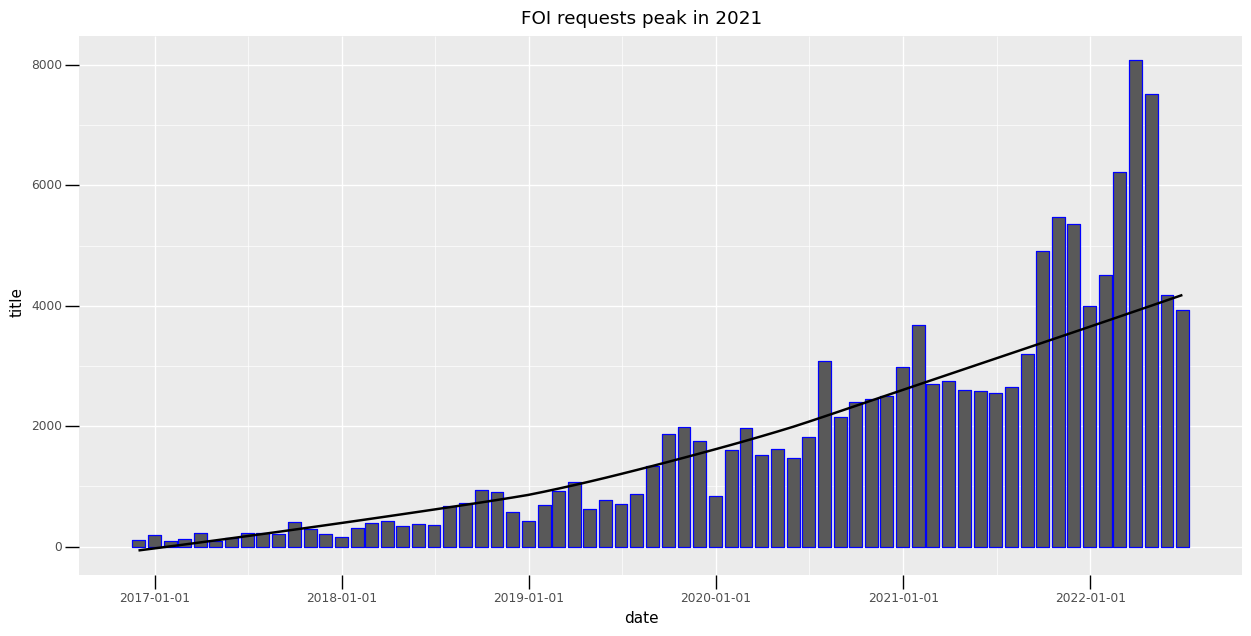

<ggplot: (315187185)>

In [53]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_col(color="blue", stat="identity") + 
    geom_smooth()+
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [54]:
month_query = df.resample('M', on='date').title.count().sort_values(ascending=False)
month_query.head(10)
#Largest number of FOI requests recorded in February 2022.

date
2022-03-31    8072
2022-04-30    7513
2022-02-28    6218
2021-10-31    5481
2021-11-30    5349
2021-09-30    4917
2022-01-31    4514
2022-05-31    4180
2021-12-31    4004
2022-06-30    3934
Name: title, dtype: int64

### By year

In [55]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

,date,title
0,2016-12-31,311
1,2017-12-31,2413
2,2018-12-31,6484
3,2019-12-31,13489
4,2020-12-31,25588
5,2021-12-31,42478
6,2022-12-31,34431


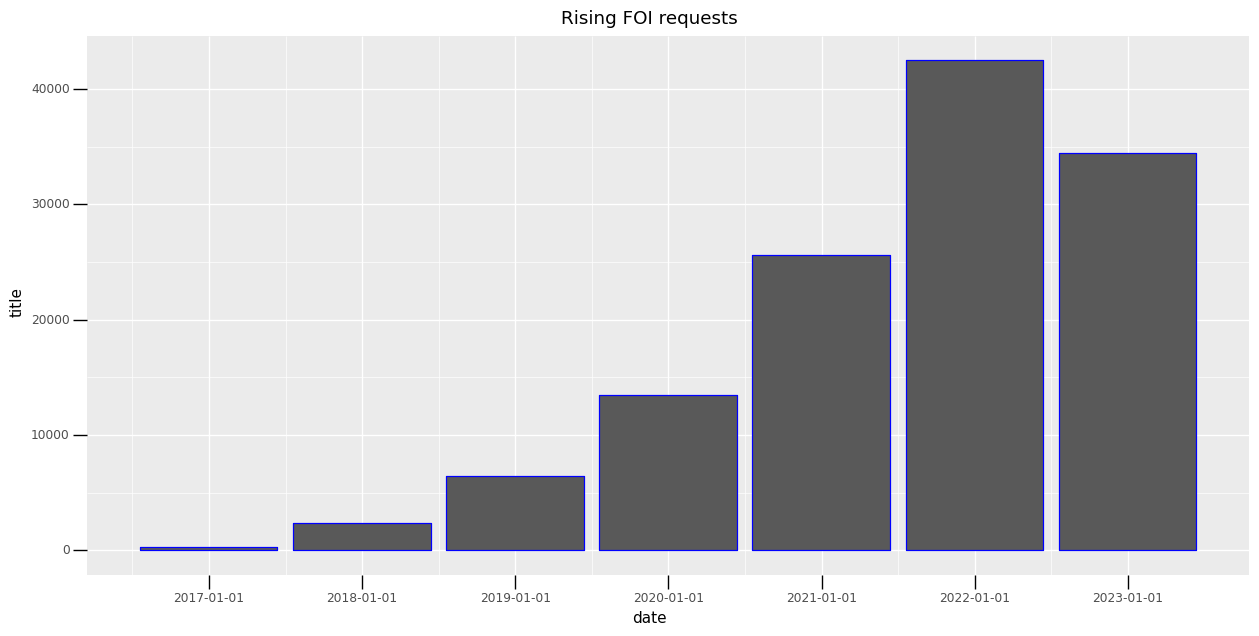

<ggplot: (315194077)>

In [56]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [57]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    675.884244
2018-12-31    168.711148
2019-12-31    108.035163
2020-12-31     89.695307
2021-12-31     66.007504
2022-12-31    -18.943924
Freq: A-DEC, Name: title, dtype: float64

## Percentage of denied each month

In [58]:
denied = df[df.status=='DENIED'].resample('A', on='date').agency.count().to_frame().reset_index()
deny = denied.merge(year_query, how='inner', on='date') #merge denied df with year_query
deny.columns= ['date', 'denials', 'total_requests'] #rename columns

In [59]:
deny ['pct_denied'] = (deny.denials / deny.total_requests) * 100
deny

,date,denials,total_requests,pct_denied
0,2016-12-31,120,311,38.585209
1,2017-12-31,1036,2413,42.934107
2,2018-12-31,2289,6484,35.302283
3,2019-12-31,4372,13489,32.411595
4,2020-12-31,7211,25588,28.181179
5,2021-12-31,9983,42478,23.501577
6,2022-12-31,4694,34431,13.633063


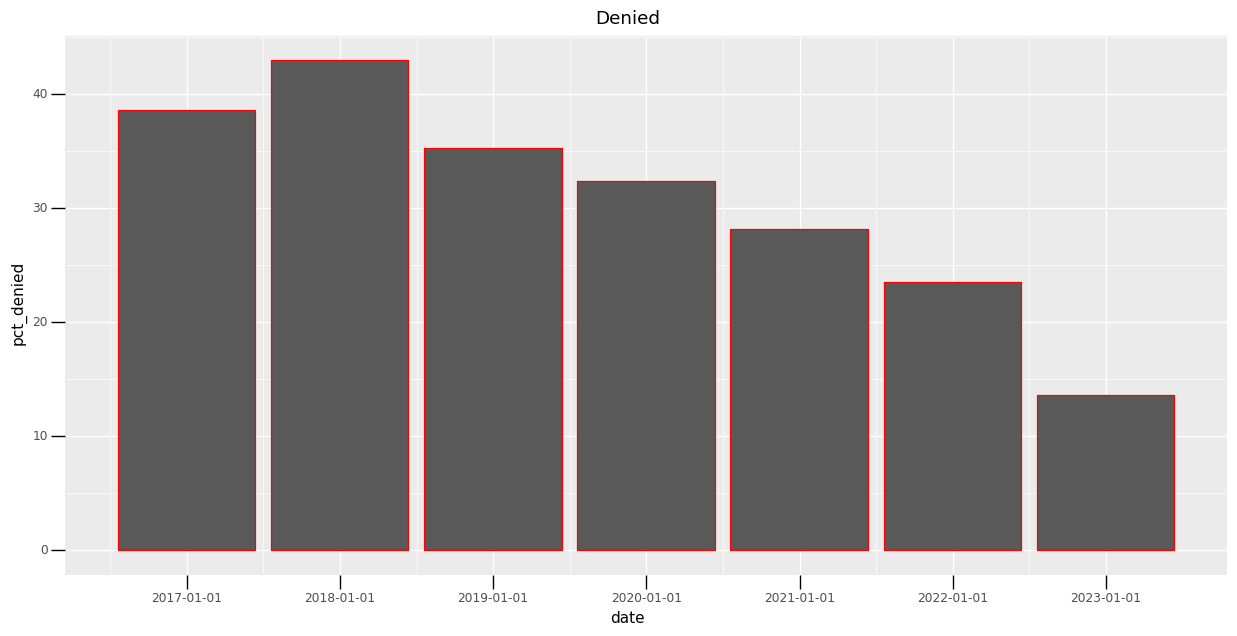

<ggplot: (314902339)>

In [60]:
(
    ggplot(deny, aes(x="date", y="pct_denied")) + 
    geom_col(color="red", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Denied")
)

## Percentage closed

These are requests which were closed after 60 days of non-response from the requestor when the FOI officer asked for clarification of the request.

In [61]:
closed = df[df.status=='CLOSED'].resample('M', on='date').agency.count().to_frame().reset_index()
close = closed.merge(month_query, how='inner', on='date') #merge closed df with year_query
close.columns= ['date', 'closures', 'total_requests'] #rename columns

In [62]:
close.head()

,date,closures,total_requests
0,2016-11-30,13,117
1,2016-12-31,31,194
2,2017-01-31,7,93
3,2017-02-28,11,127
4,2017-03-31,7,222


In [63]:
close ['pct_closed'] = (close.closures / close.total_requests) * 100
close.head()

,date,closures,total_requests,pct_closed
0,2016-11-30,13,117,11.111111
1,2016-12-31,31,194,15.979381
2,2017-01-31,7,93,7.526882
3,2017-02-28,11,127,8.661417
4,2017-03-31,7,222,3.153153


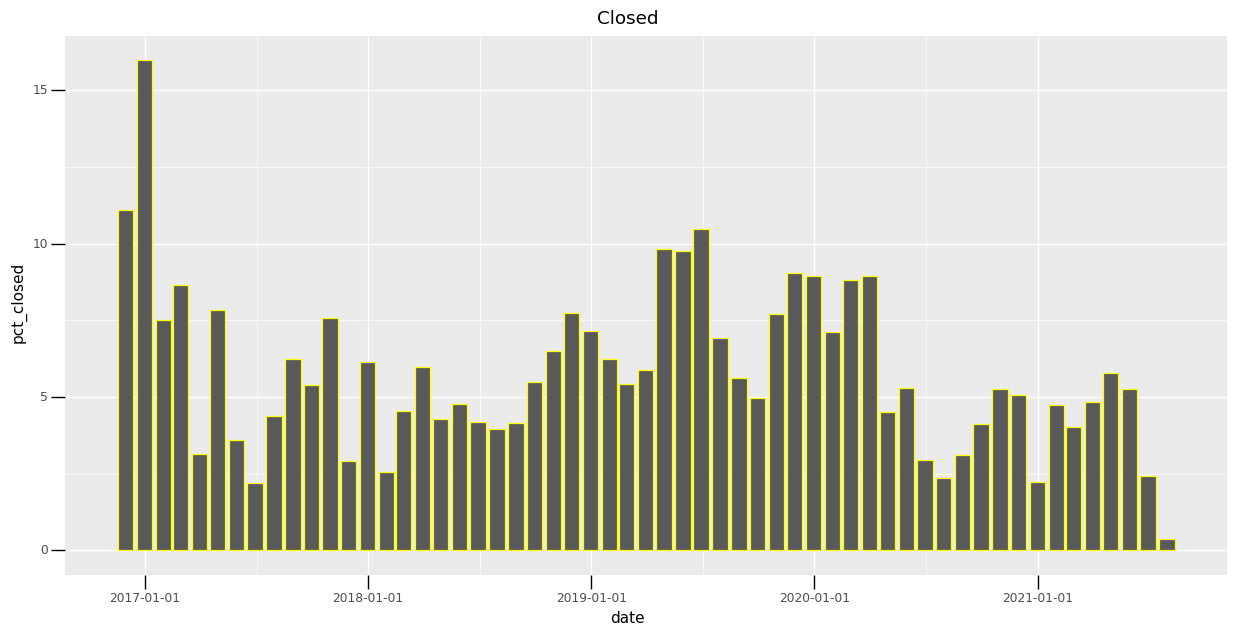

<ggplot: (315209744)>

In [64]:
(
    ggplot(close, aes(x="date", y="pct_closed")) + 
    geom_col(color="yellow", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Closed")
)

## Percentage approved

In [65]:
approved = df[df.status=='ACCEPTED'].resample('M', on='date').agency.count().to_frame().reset_index()
approve = approved.merge(month_query, how='inner', on='date') #merge approved df with year_query
approve.columns= ['date', 'approvals', 'total_requests'] #rename columns
approve

,date,approvals,total_requests
0,2016-11-30,13,117
1,2016-12-31,3,194
2,2017-01-31,1,93
3,2017-02-28,4,127
4,2017-03-31,9,222
...,...,...,...
63,2022-02-28,773,6218
64,2022-03-31,1225,8072
65,2022-04-30,866,7513
66,2022-05-31,490,4180


In [66]:
approve ['pct_approve'] = (approve.approvals / approve.total_requests) * 100
approve

,date,approvals,total_requests,pct_approve
0,2016-11-30,13,117,11.111111
1,2016-12-31,3,194,1.546392
2,2017-01-31,1,93,1.075269
3,2017-02-28,4,127,3.149606
4,2017-03-31,9,222,4.054054
...,...,...,...,...
63,2022-02-28,773,6218,12.431650
64,2022-03-31,1225,8072,15.175917
65,2022-04-30,866,7513,11.526687
66,2022-05-31,490,4180,11.722488


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


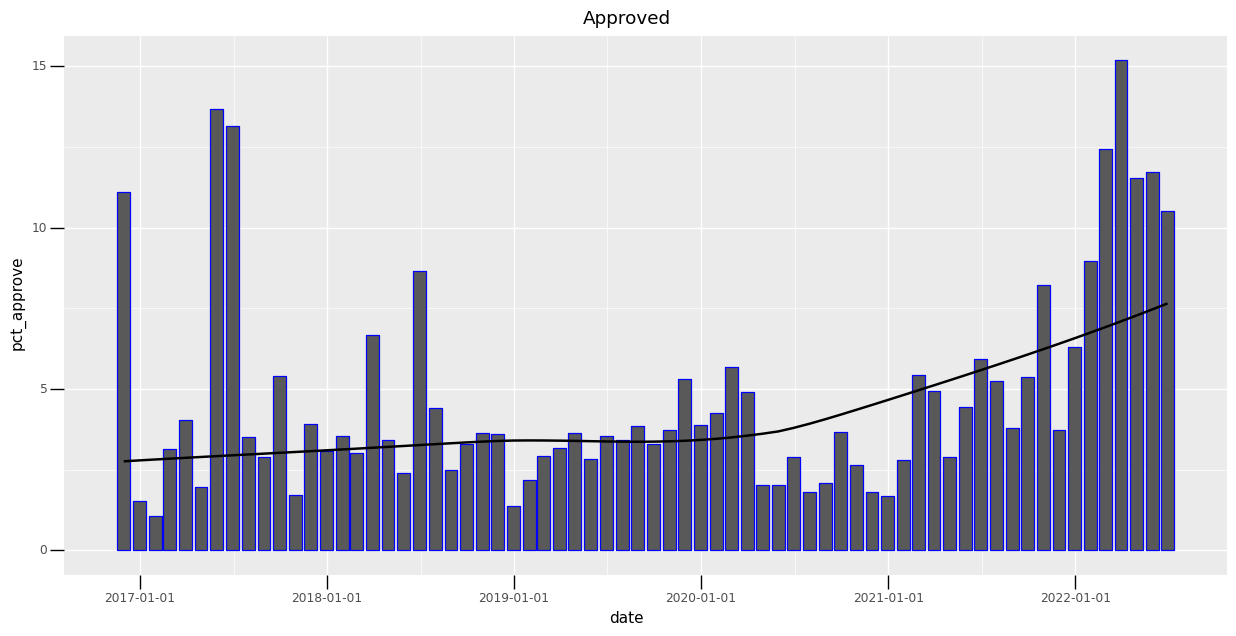

<ggplot: (315230980)>

In [67]:
(
    ggplot(approve, aes(x="date", y="pct_approve")) + 
    geom_col(color="blue", stat='identity') + 
    geom_smooth()+
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Approved")
)

In [68]:
df[df.status=="DENIED"].resample('D', on='date').agency.count().mean()

14.561274509803921

## Regression

Our questions are:

- What are the odds that your FOI request will be denied if your purpose is for media use?
- Which agency is more likely to deny an FOI request?

In [69]:
df.status.value_counts()

SUCCESSFUL                48412
DENIED                    29705
PENDING                   18379
PARTIALLY SUCCESSFUL       8714
ACCEPTED                   7913
AWAITING CLARIFICATION     4200
CLOSED                     3464
REFERRED                   2656
PROCESSING                 1715
EXTENDED                     38
Name: status, dtype: int64

In [70]:
df['status_code'] = df.status.replace({'SUCCESSFUL' or 'PARTIALLY SUCCESSFUL': 1, 'DENIED': 0})

In [71]:
df

,index,agency,date,title,status,purpose,period_covered,link,reason_denial,status_code
0,14191,DICT,2016-11-25,Projects to be implemented by the DICT for the...,ACCEPTED,Research,11/25/2016 - 11/25/2016,NaN,—,ACCEPTED
1,14217,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—,CLOSED
2,14218,DOTr,2016-11-25,List of Public Utility Bus companies and numbe...,SUCCESSFUL,Research for alternative solution in EDSA Traf...,01/01/2010 - 11/24/2016,NaN,—,1
3,14219,PAO,2016-11-25,Tax Inquiry,SUCCESSFUL,Personal Reasons,11/01/2016 - 11/15/2016,NaN,—,1
4,14220,DBM,2016-11-25,The Budget for local government buildings proj...,ACCEPTED,Architectural Thesis entitled Cagayan de Oro C...,11/25/2015 - 11/25/2016,NaN,—,ACCEPTED
...,...,...,...,...,...,...,...,...,...,...
125191,12965,PSA,2022-06-26,"Maharlika Village, Taguig City Demographics",PENDING,Academic Research,01/01/2015 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
125192,12966,BAI,2022-06-26,"The number of livestock owners in Agoncillo, B...",PENDING,Thesis Research,06/26/2022 - 06/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
125193,12967,CHED,2022-06-26,Diploma and Transcript of Records,PENDING,Immigration to Canada,06/01/1997 - 06/01/1999,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
125194,12951,DOTr,2022-06-26,Annual Road Accident Reports in Metro Manila,PENDING,Thesis,01/21/2016 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
